# Final Project - Stock Price Prediction
Kyle Lee 2018/12/10

## 1. EDA and Data Preparation

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from sklearn import metrics
import matplotlib.pyplot as plt 

In [2]:
#import data
data=pd.read_csv("stock.csv")
data.head()

,Start Date,1/1/1960,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,End Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,SPX Index,VIX Index,USGG10YR Index,USGG2YR Index,USGG5YR Index,XAU Curncy,CL1 Comdty,USURTOT Index,GDP CQOQ Index
3,NaN,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price
4,Dates,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST


In [3]:
#Delete first row, since it's all NaNs
data=data.iloc[2:,]
data.head()

,Start Date,1/1/1960,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
2,NaN,SPX Index,VIX Index,USGG10YR Index,USGG2YR Index,USGG5YR Index,XAU Curncy,CL1 Comdty,USURTOT Index,GDP CQOQ Index
3,NaN,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price
4,Dates,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST
5,1/1/1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1/4/1960,59.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Set the first column as the index, and delete it
data.index=data.iloc[:,0]
data=data.drop(data.columns[0],axis=1)
data.head()

,1/1/1960,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
Start Date,,,,,,,,,
NaN,SPX Index,VIX Index,USGG10YR Index,USGG2YR Index,USGG5YR Index,XAU Curncy,CL1 Comdty,USURTOT Index,GDP CQOQ Index
NaN,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price,Last Price
Dates,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST
1/1/1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/4/1960,59.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#set the first row as the column names,and delete them
data.columns=data.iloc[0]
data=data[4:]
data.head()

nan,SPX Index,VIX Index,USGG10YR Index,USGG2YR Index,USGG5YR Index,XAU Curncy,CL1 Comdty,USURTOT Index,GDP CQOQ Index
Start Date,,,,,,,,,
1/4/1960,59.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/5/1960,60.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/6/1960,60.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/7/1960,59.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/8/1960,59.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dates=[]
for i in enumerate(data.index):
    dates=np.append(dates,datetime.strptime(i[1],'%m/%d/%Y'))
data.index=dates

In [7]:
for i in range(9):
    print(data.columns[i],"has ",len(data.iloc[:,i].dropna()),"data points")

SPX Index has  14833 data points
VIX Index has  7286 data points
USGG10YR Index has  14497 data points
USGG2YR Index has  10901 data points
USGG5YR Index has  14473 data points
XAU Curncy has  11435 data points
CL1 Comdty has  8941 data points
USURTOT Index has  504 data points
GDP CQOQ Index has  0 data points


In [8]:
data.describe()

nan,SPX Index,VIX Index,USGG10YR Index,USGG2YR Index,USGG5YR Index,XAU Curncy,CL1 Comdty,USURTOT Index,GDP CQOQ Index
count,14833,7286,14497,10901,14473,11435,8941,504,0.0
unique,12470,2369,7823,7359,7771,7272,4832,68,0.0
top,102.09,12.42,4.202,0.25,4.154,384.5,20.48,5.4,NaN
freq,7,15,77,18,57,17,13,23,NaN


We can see the USURTOT Index and the GDP CQOQ Index has too little data, since they are unemployment and GDP, where they are mostly measured quarterly or yearly, so I decided to drop them

In [9]:
#dropping the last two columns
data2=data.iloc[:,0:7]
data2.head()

nan,SPX Index,VIX Index,USGG10YR Index,USGG2YR Index,USGG5YR Index,XAU Curncy,CL1 Comdty
1960-01-04,59.91,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,60.39,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-06,60.13,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-07,59.69,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-08,59.5,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#I used dropna instead of fillna() 
data2=data2.dropna()
data2.head()

nan,SPX Index,VIX Index,USGG10YR Index,USGG2YR Index,USGG5YR Index,XAU Curncy,CL1 Comdty
1990-01-02,359.69,17.24,7.93,7.875,7.847,399,22.89
1990-01-03,358.76,18.19,7.974,7.927,7.911,395,23.68
1990-01-04,355.67,19.22,7.972,7.91,7.9,396.5,23.41
1990-01-05,352.2,20.11,7.984,7.885,7.896,405,23.08
1990-01-08,353.79,20.26,8.012,7.893,7.907,404.6,21.62


In [11]:
#Creating the y for models, since we are predicting the next day's stock price, 
#the target value for this day should be the next day's price
data2['target']=data2["SPX Index"].shift(-1)
data2.head()

nan,SPX Index,VIX Index,USGG10YR Index,USGG2YR Index,USGG5YR Index,XAU Curncy,CL1 Comdty,target
1990-01-02,359.69,17.24,7.93,7.875,7.847,399,22.89,358.76
1990-01-03,358.76,18.19,7.974,7.927,7.911,395,23.68,355.67
1990-01-04,355.67,19.22,7.972,7.91,7.9,396.5,23.41,352.2
1990-01-05,352.2,20.11,7.984,7.885,7.896,405,23.08,353.79
1990-01-08,353.79,20.26,8.012,7.893,7.907,404.6,21.62,349.62


In [12]:
#making sure there's no na values
data2=data2.dropna()

In [13]:
data2

nan,SPX Index,VIX Index,USGG10YR Index,USGG2YR Index,USGG5YR Index,XAU Curncy,CL1 Comdty,target
1990-01-02,359.69,17.24,7.93,7.875,7.847,399,22.89,358.76
1990-01-03,358.76,18.19,7.974,7.927,7.911,395,23.68,355.67
1990-01-04,355.67,19.22,7.972,7.91,7.9,396.5,23.41,352.2
1990-01-05,352.2,20.11,7.984,7.885,7.896,405,23.08,353.79
1990-01-08,353.79,20.26,8.012,7.893,7.907,404.6,21.62,349.62
1990-01-09,349.62,22.2,8.009,7.893,7.903,403.45,22.07,347.31
1990-01-10,347.31,22.44,8.014,7.876,7.907,409.1,22.9,348.53
1990-01-11,348.53,20.05,8.044,7.92,7.949,412.1,23.14,339.93
1990-01-12,339.93,24.64,8.096,7.938,7.983,416.25,23.13,337
1990-01-15,337,26.34,8.113,7.947,7.995,415.6,22.36,340.75


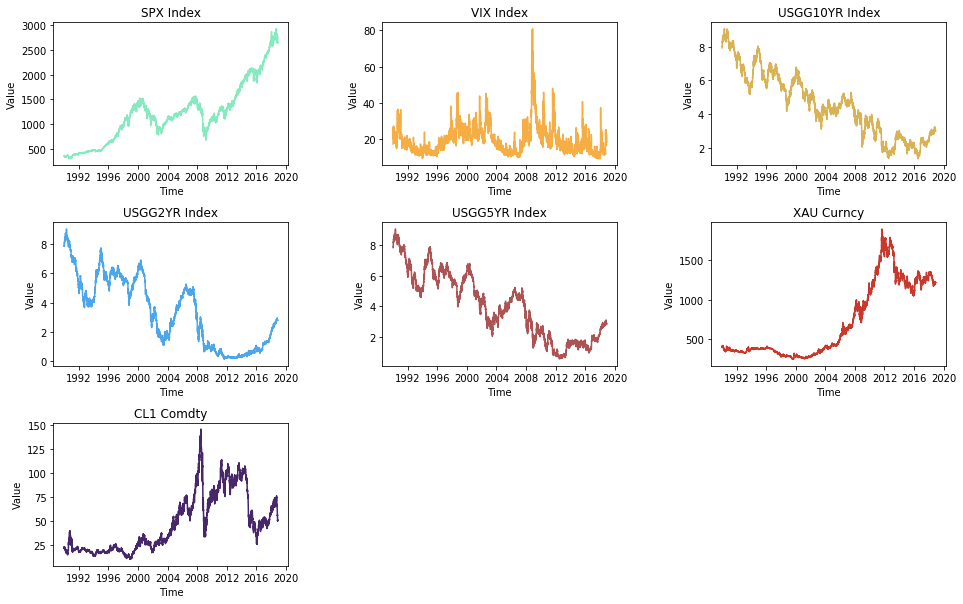

In [14]:
fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for j in range(7):
    ax= fig.add_subplot(3,3,j+1)
    y=np.array(data2[data2.columns[j]])
    y=[float(i) for i in y]
    x=data2[data2.columns[j]].index
    ax.plot(x,y,c=np.random.rand(3))
    ax.set_title(data2.columns[j])
    ax.set_ylabel('Value')
    ax.set_xlabel('Time')
plt.show()

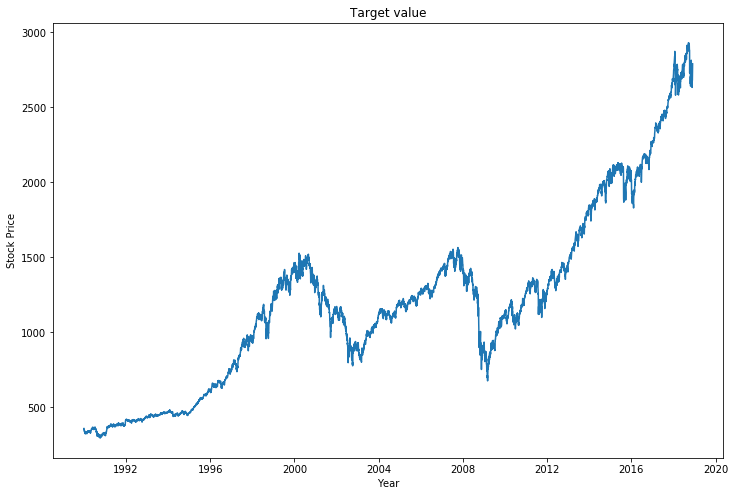

In [15]:
#briefly plot the data for SPY
y=np.array(data2['target'])
y=[float(i) for i in y]
x=data2['target'].index
figure(figsize=(12,8))
plt.plot(x,y)
plt.title('Target value')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.show()

## 2. Prepare X, y for training

Get the X and y ready for implementing machine learning models
Also I decided to try out both regression and classification

In [16]:
X_data=np.array(data2.drop(['SPX Index', 'target'],axis=1))
# X_data=[float(i) for i in X_data]
X_data=X_data.astype(float)
print("Shape of X_data is: ", X_data.shape,'\nSneak peek on first five elements: \n', X_data[0:5])

Shape of X_data is:  (7228, 6) 
Sneak peek on first five elements: 
 [[ 17.24    7.93    7.875   7.847 399.     22.89 ]
 [ 18.19    7.974   7.927   7.911 395.     23.68 ]
 [ 19.22    7.972   7.91    7.9   396.5    23.41 ]
 [ 20.11    7.984   7.885   7.896 405.     23.08 ]
 [ 20.26    8.012   7.893   7.907 404.6    21.62 ]]


In [17]:
y_data=np.array(data2.target)
y_data=[float(i) for i in y_data]
print("Length of y_data is :", len(y_data),'\nSneak peek on first five elements: \n', y_data[0:5])

Length of y_data is : 7228 
Sneak peek on first five elements: 
 [358.76, 355.67, 352.2, 353.79, 349.62]


In [18]:
#Turning it into classification
data_f=data2.astype(float)
data_f.head()

nan,SPX Index,VIX Index,USGG10YR Index,USGG2YR Index,USGG5YR Index,XAU Curncy,CL1 Comdty,target
1990-01-02,359.69,17.24,7.930,7.875,7.847,399.0,22.89,358.76
1990-01-03,358.76,18.19,7.974,7.927,7.911,395.0,23.68,355.67
1990-01-04,355.67,19.22,7.972,7.910,7.900,396.5,23.41,352.20
1990-01-05,352.20,20.11,7.984,7.885,7.896,405.0,23.08,353.79
1990-01-08,353.79,20.26,8.012,7.893,7.907,404.6,21.62,349.62


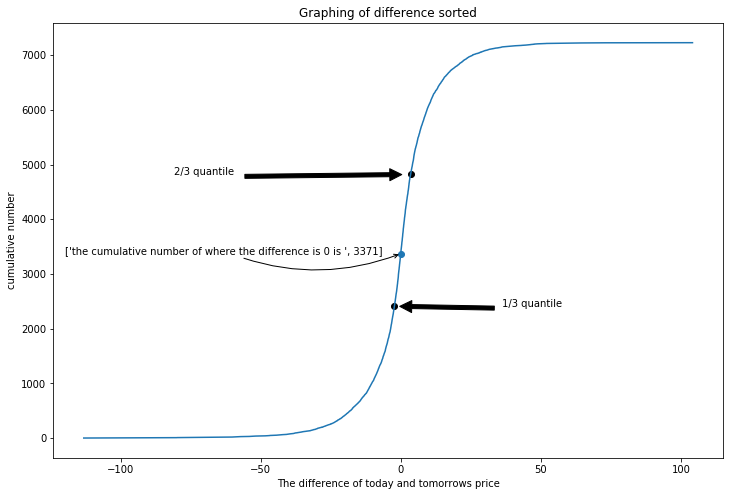

In [19]:
data_f['diff']=data_f['target']-data_f['SPX Index']
sorted_diff=np.sort(data_f['diff'])
leng=len(data_f['diff'])
figure(figsize=(12,8))
plt.plot(sorted_diff,range(leng))
plt.scatter(sorted_diff[int(leng/3)],int(leng/3),c='black')
plt.scatter(sorted_diff[int(leng*2/3)],int(leng*2/3),c='black')
plt.scatter(sorted_diff[sorted_diff>0][0],np.argwhere(sorted_diff>0)[0])
plt.annotate(['the cumulative number of where the difference is 0 is ',int(np.argwhere(sorted_diff>0)[0])],
             xy=(sorted_diff[sorted_diff>0][0],np.argwhere(sorted_diff>0)[0]),
            xytext=(-120,np.argwhere(sorted_diff>0)[0]),arrowprops=dict(arrowstyle='->',connectionstyle="arc3,rad=.2"))
plt.annotate('1/3 quantile',xy=(sorted_diff[int(leng/3)],int(leng/3)),
             xytext=(36,int(leng/3)),arrowprops=dict(facecolor='black',shrink=0.05))
plt.annotate('2/3 quantile',xy=(sorted_diff[int(leng*(2/3))],int(leng*(2/3))),
             xytext=(-81,int(leng*2/3)),arrowprops=dict(facecolor='black',shrink=0.05))
plt.xlabel('The difference of today and tomorrows price')
plt.ylabel('cumulative number')
plt.title('Graphing of difference sorted')
plt.show()

Creating classification

In [20]:
data_f['classify']=1
data_f['classify'].loc[((data_f['diff']>data_f['diff'].quantile(2/3)) & (data_f['diff']>0))]=2
data_f['classify'].loc[((data_f['diff']<data_f['diff'].quantile(1/3)) & (data_f['diff']<0))]=0
data_f

C:\Users\kyle1\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


nan,SPX Index,VIX Index,USGG10YR Index,USGG2YR Index,USGG5YR Index,XAU Curncy,CL1 Comdty,target,diff,classify
1990-01-02,359.69,17.24,7.9300,7.8750,7.8470,399.00,22.89,358.76,-0.93,1
1990-01-03,358.76,18.19,7.9740,7.9270,7.9110,395.00,23.68,355.67,-3.09,0
1990-01-04,355.67,19.22,7.9720,7.9100,7.9000,396.50,23.41,352.20,-3.47,0
1990-01-05,352.20,20.11,7.9840,7.8850,7.8960,405.00,23.08,353.79,1.59,1
1990-01-08,353.79,20.26,8.0120,7.8930,7.9070,404.60,21.62,349.62,-4.17,0
1990-01-09,349.62,22.20,8.0090,7.8930,7.9030,403.45,22.07,347.31,-2.31,0
1990-01-10,347.31,22.44,8.0140,7.8760,7.9070,409.10,22.90,348.53,1.22,1
1990-01-11,348.53,20.05,8.0440,7.9200,7.9490,412.10,23.14,339.93,-8.60,0
1990-01-12,339.93,24.64,8.0960,7.9380,7.9830,416.25,23.13,337.00,-2.93,0
1990-01-15,337.00,26.34,8.1130,7.9470,7.9950,415.60,22.36,340.75,3.75,2


In [21]:
text=['The trend is going down: ','The trend is staying the same: ','The trend is going up : ']
for i in range(3):
    print(text[i],sum(data_f['classify']==i))

The trend is going down:  2408
The trend is staying the same:  2411
The trend is going up :  2409


X_data remains the same for classifier, but y_data would be the 'classify' in the last column of the dataframe

In [22]:
y_data_class=np.array(data_f.classify)
print("Length of y_data is :", len(y_data_class),'\nSneak peek on first five elements: \n', y_data_class[0:5])

Length of y_data is : 7228 
Sneak peek on first five elements: 
 [1 0 0 1 0]


Standardize data and split into train test data

In [23]:
X_train=np.array(X_data[0:int(0.8*len(X_data))])
y_train=np.array(y_data[0:int(0.8*len(y_data))])
y_train_class=np.array(y_data_class[0:int(0.8*len(y_data_class))])
X_test=np.array(X_data[int(0.8*len(X_data)):])
y_test=np.array(y_data[int(0.8*len(y_data)):])
y_test_class=np.array(y_data_class[int(0.8*len(y_data_class)):])

In [24]:
#Data Scaling
sc=StandardScaler()
sc2=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
y_train=sc2.fit_transform(y_train.reshape(-1,1))
y_test=sc2.transform(y_test.reshape(-1,1))
X_data_sc=sc.fit_transform(X_data)
y_data_sc=sc.fit_transform(np.array(y_data).reshape(-1,1))

## 3. Machine Learning methods

Linear Regression

In [25]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

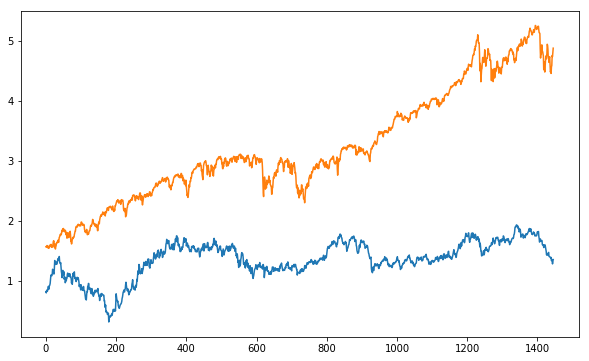

In [26]:
#fit data to model and graph results
y_pred=model.predict(X_test)
figure(figsize=(10,6))
plt.plot(y_pred)
plt.plot(y_test)
plt.show()

In [27]:
print("RMSE of test set: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


RMSE of test set:  2.01655443941397


Since it looks completely off, I wanted to check train data


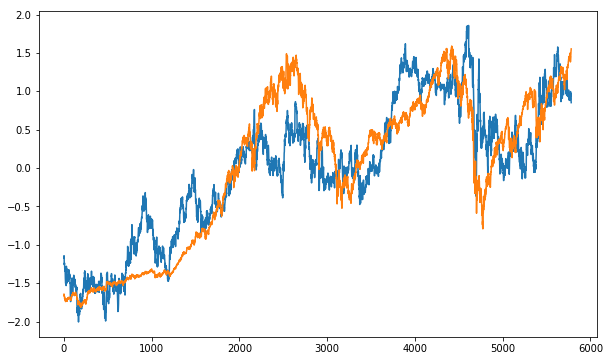

In [28]:
predictions=model.predict(X_train)
figure(figsize=(10,6))
plt.plot(predictions)
plt.plot(y_train)
plt.show()

In [29]:
print("RMSE of train set: ",np.sqrt(metrics.mean_squared_error(y_train,predictions)))


RMSE of train set:  0.47315506396143053


Which actually looks decent.

Lasso Regression

In [30]:
clf = linear_model.Lasso(alpha=0.2)
clf.fit(X_train,y_train)


Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

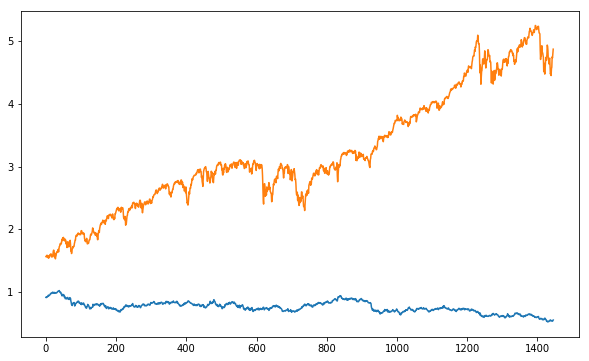

RMSE of LASSO on test set:  2.659531397249428


In [31]:
#fit data to model and graph results
y_pred=clf.predict(X_test)
figure(figsize=(10,6))
plt.plot(y_pred)
plt.plot(y_test)
plt.show()
print("RMSE of LASSO on test set: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

We can see that using LASSO gives us a higher RMSE, since LASSO performs variable selection, thus lowering the explanitory power(also if we change the alpha to 1, the prediction drops flat)

Logistic Regression

In [32]:
lr=linear_model.LogisticRegression(multi_class='multinomial',solver='newton-cg')
lr.fit(X_train,y_train_class)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
y_pred=lr.predict(X_test)

[[ 20 274 250]
 [  9 183 103]
 [ 30 284 293]]


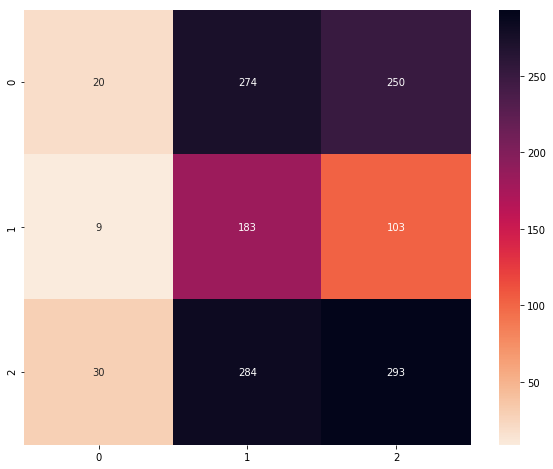

In [34]:
cm=metrics.confusion_matrix(y_test_class,y_pred)
print(cm)
import seaborn as sn
cmap = sn.cm.rocket_r
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True,cmap=cmap,fmt='g')
plt.show()

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class, y_pred))

             precision    recall  f1-score   support

          0       0.34      0.04      0.07       544
          1       0.25      0.62      0.35       295
          2       0.45      0.48      0.47       607

avg / total       0.37      0.34      0.29      1446



We can see that the prediction for the [2] is the best, but it doensn't predict price decrease well. Also all three scores are low.
So I tried gridsearch to find better parameters

In [36]:
from sklearn.model_selection import GridSearchCV
params={'C': [100,10,1,.01,.001]}
y_pred=lr.predict(X_test)

In [37]:
gs = GridSearchCV(lr, params, n_jobs=-1)
gs.fit(X_train, y_train_class)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [100, 10, 1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
gs.best_params_

{'C': 0.001}

In [39]:
y_pred = gs.predict(X_test)

[[  0 122 422]
 [  0 100 195]
 [  0 150 457]]


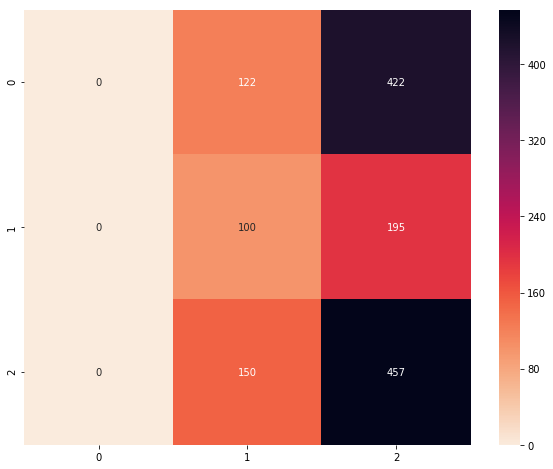

In [40]:
cm=metrics.confusion_matrix(y_test_class,y_pred)
print(cm)
import seaborn as sn
cmap = sn.cm.rocket_r
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True,cmap=cmap,fmt='g')
plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       544
          1       0.27      0.34      0.30       295
          2       0.43      0.75      0.54       607

avg / total       0.23      0.39      0.29      1446



C:\Users\kyle1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


We can see the predictions for [2] went up even more, but the precision and f1 score lowered.

SVM

In [42]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf', C=1000, gamma=0.1)
svr.fit(X_train,y_train.ravel())

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
y_pred=svr.predict(X_test)

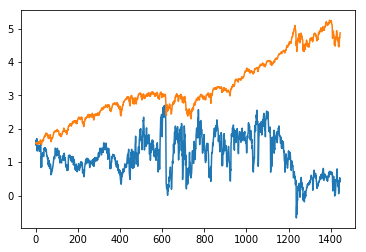

RMSE of SVR on test set:  2.3378401543996925


In [44]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()
print("RMSE of SVR on test set: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

SVC

In [45]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',C=1000)
svc.fit(X_train,y_train_class.ravel())

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
y_pred=svc.predict(X_test)

[[ 66  72 406]
 [ 53  40 202]
 [ 88  73 446]]


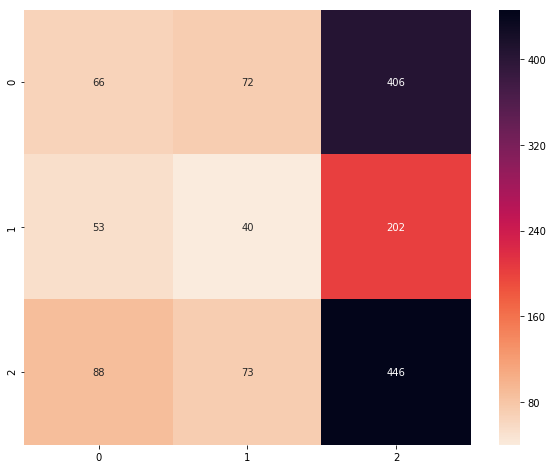

In [47]:
cm=metrics.confusion_matrix(y_test_class,y_pred)
print(cm)
import seaborn as sn
cmap = sn.cm.rocket_r
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True,cmap=cmap,fmt='g')
plt.show()

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class, y_pred))

             precision    recall  f1-score   support

          0       0.32      0.12      0.18       544
          1       0.22      0.14      0.17       295
          2       0.42      0.73      0.54       607

avg / total       0.34      0.38      0.33      1446



Again we can see that SVC mostly predicts 2 instead of 0 and 1.

RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [50]:
rfr=RandomForestRegressor(n_estimators=1000,random_state=42, max_features='sqrt',max_depth=150,oob_score=True)
rfr.fit(X_train,y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=150,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [51]:
y_pred=rfr.predict(X_test)

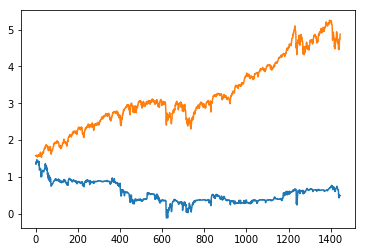

In [52]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()

In [53]:
print("RMSE of randomforest on test set: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE of randomforest on test set:  2.855658265912516


In [54]:
rfc=RandomForestClassifier(n_estimators=1000,random_state=42, max_features='sqrt',max_depth=50)
rfc.fit(X_train,y_train_class.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [55]:
y_pred=rfc.predict(X_test)

[[221 206 117]
 [157  98  40]
 [268 193 146]]


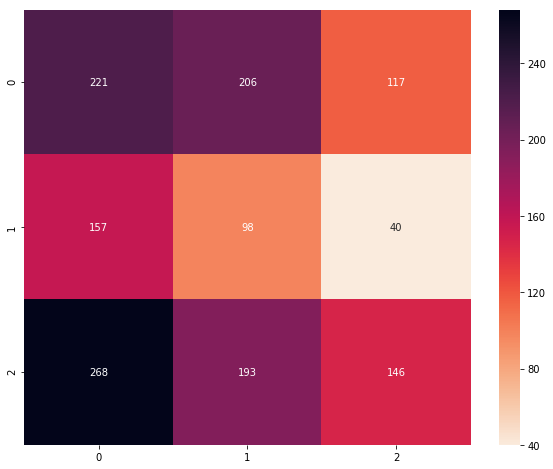

In [56]:
cm=metrics.confusion_matrix(y_test_class,y_pred)
print(cm)
import seaborn as sn
cmap = sn.cm.rocket_r
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True,cmap=cmap,fmt='g')
plt.show()

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class, y_pred))

             precision    recall  f1-score   support

          0       0.34      0.41      0.37       544
          1       0.20      0.33      0.25       295
          2       0.48      0.24      0.32       607

avg / total       0.37      0.32      0.32      1446



LightGbm

In [58]:
import lightgbm as lgb

In [59]:
d_train=lgb.Dataset(X_train, label=y_train.ravel())

params={}
params['learning_rate']=0.1
params['boosting_type']='gbdt'
params['objective']='regression'
params['sub_feature']=0.5
params['num_leaves']=1024
params['min_data']=50
params['max_depth']=10
params['verbose']=2

In [60]:
clf=lgb.train(params, d_train,1000)

In [61]:
y_pred=clf.predict(X_test)

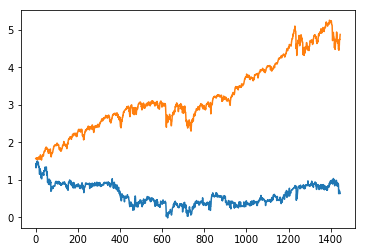

In [62]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()

LightGBM classifier

In [63]:
d_train=lgb.Dataset(X_train, label=y_train_class.ravel())

params={}
params['learning_rate']=0.01
params['boosting_type']='gbdt'
params['objective']='multiclass'
params['sub_feature']=0.5
params['num_leaves']=1024
params['min_data']=50
params['max_depth']=10
params['num_class']=3


In [64]:
clf=lgb.train(params, d_train,1000)

In [65]:
y_pred=clf.predict(X_test)

In [66]:
temp=[]
for i in y_pred:
    temp=np.append(temp,np.argmax(y_pred[0]))
y_pred=np.array(temp)

[[  0   0 544]
 [  0   0 295]
 [  0   0 607]]


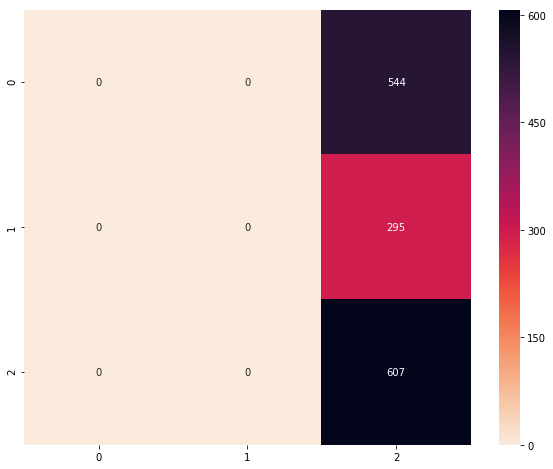

In [67]:
cm=metrics.confusion_matrix(y_test_class,y_pred)
print(cm)
import seaborn as sn
cmap = sn.cm.rocket_r
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True,cmap=cmap,fmt='g')
plt.show()

In [68]:
print(classification_report(y_test_class, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       544
          1       0.00      0.00      0.00       295
          2       0.42      1.00      0.59       607

avg / total       0.18      0.42      0.25      1446



C:\Users\kyle1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Deep learning
1. prepare data

In [69]:
def cut_time(data,stepsize,steplen):
    temp=[]
    times=int((len(data)-steplen)/stepsize)
    for i in range(times):
        temp.append(np.array(data[i*stepsize:i*stepsize+steplen]))
    return np.array(temp)
def cut_time_y(data,stepsize,steplen):
    temp=[]
    times=int((len(data)-steplen)/stepsize)
    for i in range(times):
        temp.append(np.array(data[i*stepsize+steplen]))
    return np.array(temp)


In [70]:
sc = StandardScaler()
X_data=sc.fit_transform(X_data)
y_data=sc.fit_transform(np.array(y_data).reshape(-1,1))
features=len(X_data[0])
stepsize=5
steplen=5

X_data2=cut_time(X_data,stepsize,steplen)
X_data2=X_data2.reshape(X_data2.shape[0],steplen,features)
y_data2=cut_time_y(y_data,stepsize,steplen)
y_data2_class=cut_time_y(y_data_class,stepsize,steplen)

X_train=X_data2[0:int(0.6*len(X_data2))]
y_train=y_data2[0:int(0.6*len(y_data2))]
y_train_class=y_data2_class[0:int(0.6*len(y_data2_class))]

X_val=X_data2[int(0.6*len(X_data2)):int(0.8*len(X_data2))]
y_val=y_data2[int(0.6*len(y_data2)):int(0.8*len(y_data2))]
y_val_class=y_data2_class[int(0.6*len(y_data2_class)):int(0.8*len(y_data2_class))]

X_test=X_data2[int(0.8*len(X_data2)):]
y_test=y_data2[int(0.8*len(y_data2)):]
y_test_class=y_data2_class[int(0.8*len(y_data2_class)):]

X_train

array([[[-0.25896952,  1.76397678,  1.9168328 ,  1.79011164,
         -0.69458277, -0.830246  ],
        [-0.13760766,  1.78707541,  1.93892621,  1.81995062,
         -0.70326133, -0.80374729],
        [-0.00602585,  1.78602547,  1.93170337,  1.81482205,
         -0.70000687, -0.81280381],
        [ 0.10767105,  1.79232509,  1.92108153,  1.81295711,
         -0.68156493, -0.8238729 ],
        [ 0.12683345,  1.80702422,  1.92448052,  1.81808569,
         -0.68243279, -0.8728452 ]],

       [[ 0.37466714,  1.80544932,  1.92448052,  1.81622075,
         -0.68492788, -0.857751  ],
        [ 0.40532698,  1.80807416,  1.91725767,  1.81808569,
         -0.67266941, -0.82991058],
        [ 0.10000609,  1.82382323,  1.9359521 ,  1.83766752,
         -0.6661605 , -0.82186034],
        [ 0.6863755 ,  1.85112161,  1.94359982,  1.85351949,
         -0.65715649, -0.82219576],
        [ 0.90354936,  1.86004608,  1.94742368,  1.8591143 ,
         -0.65856676, -0.84802362]],

       [[ 0.62761081,  1.9

In [71]:
# one hot encode
from keras.utils import to_categorical
y_train_class = to_categorical(np.array(y_train_class))
y_val_class = to_categorical(np.array(y_val_class))

C:\Users\kyle1\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [72]:
y_test_class

array([1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 0,
       2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2, 1,
       2, 0, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 1, 2, 0,
       2, 0, 2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       1, 1, 0, 0, 2, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 1,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 0,
       1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1,
       2, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 2, 2,
       2, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 1, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2,
       2, 0, 2], dtype=int64)

In [73]:
import tensorflow as tf

In [74]:
import keras
from keras.layers import Dense, Flatten, BatchNormalization,Dropout, Input, merge, concatenate,add
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, LSTM
from keras.layers import Activation
from keras.models import Sequential
from keras.optimizers import Adam, rmsprop, sgd
from keras import backend as K
from keras.layers.advanced_activations import LeakyReLU, PReLU, ReLU
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.models import Model

In [75]:
X_train.shape

(866, 5, 6)

CNN 1D

In [76]:
inputs=Input(X_train.shape[1:])
x=Dense(32)(inputs)
x=Conv1D(16,kernel_size=3,strides=1)(x)
x=BatchNormalization()(x)
# x=ReLU()(x)

# x1=Conv1D(16,4)(x)
# x=LeakyReLU(alpha=0.1)(x1)

# x2=MaxPooling1D(pool_size=1)(x)
# x=concatenate([x1,x2])
x=Flatten()(x)
# x=Dense(32,name='my16')(x)

predictions=Dense(3, activation='softmax')(x)
model=Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history=model.fit(X_train,y_train_class, batch_size=256, epochs=1000, verbose=1,
                 validation_data=(X_val,y_val_class))
#                  callbacks=[ReduceLROnPlateau(monitor='acc',factor=0.2, patience=5, min_lr= 0.00001),EarlyStopping(monitor='acc',patience=7)])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5, 6)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5, 32)             224       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 16)             1552      
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 16)             64        
_________________________________________________________________
flatten_1 (Flatten)          (None, 48)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 147       
Total params: 1,987
Trainable params: 1,955
Non-trainable params: 32
_________________________________________________________________
Train o

Epoch 53/1000
866/866 [==============================] - 0s 20us/step - loss: 0.9868 - acc: 0.4873 - val_loss: 1.4623 - val_acc: 0.3495
Epoch 54/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9844 - acc: 0.4919 - val_loss: 1.4570 - val_acc: 0.3495
Epoch 55/1000
866/866 [==============================] - 0s 15us/step - loss: 0.9865 - acc: 0.4815 - val_loss: 1.4469 - val_acc: 0.3495
Epoch 56/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9858 - acc: 0.4850 - val_loss: 1.4380 - val_acc: 0.3529
Epoch 57/1000
866/866 [==============================] - 0s 18us/step - loss: 0.9865 - acc: 0.4873 - val_loss: 1.4239 - val_acc: 0.3564
Epoch 58/1000
866/866 [==============================] - 0s 21us/step - loss: 0.9864 - acc: 0.4838 - val_loss: 1.4169 - val_acc: 0.3529
Epoch 59/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9860 - acc: 0.4746 - val_loss: 1.4096 - val_acc: 0.3529
Epoch 60/1000
866/866 [=========================

866/866 [==============================] - 0s 16us/step - loss: 0.9816 - acc: 0.5000 - val_loss: 1.3746 - val_acc: 0.3772
Epoch 114/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9795 - acc: 0.5046 - val_loss: 1.3926 - val_acc: 0.3737
Epoch 115/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9767 - acc: 0.5115 - val_loss: 1.3982 - val_acc: 0.3737
Epoch 116/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9759 - acc: 0.5023 - val_loss: 1.3946 - val_acc: 0.3772
Epoch 117/1000
866/866 [==============================] - 0s 18us/step - loss: 0.9779 - acc: 0.5023 - val_loss: 1.3859 - val_acc: 0.3772
Epoch 118/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9784 - acc: 0.4965 - val_loss: 1.3834 - val_acc: 0.3772
Epoch 119/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9785 - acc: 0.5058 - val_loss: 1.3836 - val_acc: 0.3772
Epoch 120/1000
866/866 [==============================] 

Epoch 173/1000
866/866 [==============================] - 0s 20us/step - loss: 0.9732 - acc: 0.5046 - val_loss: 1.4504 - val_acc: 0.3806
Epoch 174/1000
866/866 [==============================] - 0s 21us/step - loss: 0.9748 - acc: 0.5150 - val_loss: 1.4545 - val_acc: 0.3806
Epoch 175/1000
866/866 [==============================] - 0s 20us/step - loss: 0.9781 - acc: 0.5104 - val_loss: 1.4574 - val_acc: 0.3841
Epoch 176/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9753 - acc: 0.5139 - val_loss: 1.4612 - val_acc: 0.3875
Epoch 177/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9776 - acc: 0.5139 - val_loss: 1.4750 - val_acc: 0.3806
Epoch 178/1000
866/866 [==============================] - 0s 26us/step - loss: 0.9751 - acc: 0.5150 - val_loss: 1.4831 - val_acc: 0.3806
Epoch 179/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9743 - acc: 0.5127 - val_loss: 1.4829 - val_acc: 0.3910
Epoch 180/1000
866/866 [=================

Epoch 233/1000
866/866 [==============================] - 0s 15us/step - loss: 0.9727 - acc: 0.5150 - val_loss: 1.5297 - val_acc: 0.4152
Epoch 234/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9722 - acc: 0.5139 - val_loss: 1.5375 - val_acc: 0.4083
Epoch 235/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9721 - acc: 0.5081 - val_loss: 1.5464 - val_acc: 0.4083
Epoch 236/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9730 - acc: 0.5035 - val_loss: 1.5434 - val_acc: 0.4083
Epoch 237/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9727 - acc: 0.5092 - val_loss: 1.5316 - val_acc: 0.4118
Epoch 238/1000
866/866 [==============================] - 0s 18us/step - loss: 0.9734 - acc: 0.5115 - val_loss: 1.5285 - val_acc: 0.4152
Epoch 239/1000
866/866 [==============================] - 0s 18us/step - loss: 0.9719 - acc: 0.5104 - val_loss: 1.5315 - val_acc: 0.4118
Epoch 240/1000
866/866 [=================

Epoch 293/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9731 - acc: 0.5092 - val_loss: 1.5863 - val_acc: 0.4291
Epoch 294/1000
866/866 [==============================] - 0s 18us/step - loss: 0.9714 - acc: 0.5069 - val_loss: 1.5840 - val_acc: 0.4256
Epoch 295/1000
866/866 [==============================] - 0s 22us/step - loss: 0.9707 - acc: 0.5104 - val_loss: 1.5903 - val_acc: 0.4221
Epoch 296/1000
866/866 [==============================] - 0s 30us/step - loss: 0.9704 - acc: 0.5127 - val_loss: 1.6003 - val_acc: 0.4256
Epoch 297/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9733 - acc: 0.4977 - val_loss: 1.6054 - val_acc: 0.4325
Epoch 298/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9708 - acc: 0.5173 - val_loss: 1.6045 - val_acc: 0.4360
Epoch 299/1000
866/866 [==============================] - 0s 18us/step - loss: 0.9704 - acc: 0.5115 - val_loss: 1.6133 - val_acc: 0.4291
Epoch 300/1000
866/866 [=================

Epoch 353/1000
866/866 [==============================] - 0s 15us/step - loss: 0.9713 - acc: 0.5115 - val_loss: 1.6481 - val_acc: 0.4394
Epoch 354/1000
866/866 [==============================] - 0s 15us/step - loss: 0.9700 - acc: 0.5115 - val_loss: 1.6460 - val_acc: 0.4325
Epoch 355/1000
866/866 [==============================] - 0s 15us/step - loss: 0.9699 - acc: 0.5104 - val_loss: 1.6491 - val_acc: 0.4325
Epoch 356/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9723 - acc: 0.5139 - val_loss: 1.6570 - val_acc: 0.4394
Epoch 357/1000
866/866 [==============================] - 0s 21us/step - loss: 0.9696 - acc: 0.5219 - val_loss: 1.6625 - val_acc: 0.4429
Epoch 358/1000
866/866 [==============================] - 0s 24us/step - loss: 0.9713 - acc: 0.5115 - val_loss: 1.6589 - val_acc: 0.4429
Epoch 359/1000
866/866 [==============================] - 0s 15us/step - loss: 0.9696 - acc: 0.5162 - val_loss: 1.6509 - val_acc: 0.4429
Epoch 360/1000
866/866 [=================

Epoch 413/1000
866/866 [==============================] - 0s 20us/step - loss: 0.9689 - acc: 0.5115 - val_loss: 1.6381 - val_acc: 0.4048
Epoch 414/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9684 - acc: 0.5115 - val_loss: 1.6338 - val_acc: 0.4048
Epoch 415/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9675 - acc: 0.5081 - val_loss: 1.6268 - val_acc: 0.4187
Epoch 416/1000
866/866 [==============================] - 0s 15us/step - loss: 0.9694 - acc: 0.5104 - val_loss: 1.6201 - val_acc: 0.4187
Epoch 417/1000
866/866 [==============================] - 0s 22us/step - loss: 0.9695 - acc: 0.5150 - val_loss: 1.6218 - val_acc: 0.4394
Epoch 418/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9672 - acc: 0.5127 - val_loss: 1.6205 - val_acc: 0.4394
Epoch 419/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9689 - acc: 0.5173 - val_loss: 1.6219 - val_acc: 0.4325
Epoch 420/1000
866/866 [=================

866/866 [==============================] - 0s 17us/step - loss: 0.9700 - acc: 0.5127 - val_loss: 1.6435 - val_acc: 0.4291
Epoch 473/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9709 - acc: 0.5185 - val_loss: 1.6383 - val_acc: 0.4221
Epoch 474/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9714 - acc: 0.5092 - val_loss: 1.6450 - val_acc: 0.4118
Epoch 475/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9676 - acc: 0.5173 - val_loss: 1.6484 - val_acc: 0.4083
Epoch 476/1000
866/866 [==============================] - 0s 18us/step - loss: 0.9691 - acc: 0.5162 - val_loss: 1.6442 - val_acc: 0.4048
Epoch 477/1000
866/866 [==============================] - 0s 18us/step - loss: 0.9687 - acc: 0.5092 - val_loss: 1.6376 - val_acc: 0.4083
Epoch 478/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9712 - acc: 0.5162 - val_loss: 1.6319 - val_acc: 0.4083
Epoch 479/1000
866/866 [==============================] 

Epoch 532/1000
866/866 [==============================] - 0s 15us/step - loss: 0.9683 - acc: 0.5196 - val_loss: 1.5826 - val_acc: 0.4187
Epoch 533/1000
866/866 [==============================] - 0s 18us/step - loss: 0.9677 - acc: 0.5173 - val_loss: 1.5883 - val_acc: 0.4221
Epoch 534/1000
866/866 [==============================] - 0s 20us/step - loss: 0.9673 - acc: 0.5139 - val_loss: 1.6000 - val_acc: 0.4083
Epoch 535/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9693 - acc: 0.5069 - val_loss: 1.6156 - val_acc: 0.4118
Epoch 536/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9689 - acc: 0.5185 - val_loss: 1.6128 - val_acc: 0.4118
Epoch 537/1000
866/866 [==============================] - 0s 15us/step - loss: 0.9668 - acc: 0.5185 - val_loss: 1.6031 - val_acc: 0.4118
Epoch 538/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9676 - acc: 0.5173 - val_loss: 1.5974 - val_acc: 0.4152
Epoch 539/1000
866/866 [=================

866/866 [==============================] - 0s 17us/step - loss: 0.9677 - acc: 0.5139 - val_loss: 1.6324 - val_acc: 0.4221
Epoch 592/1000
866/866 [==============================] - 0s 20us/step - loss: 0.9678 - acc: 0.5139 - val_loss: 1.6283 - val_acc: 0.4221
Epoch 593/1000
866/866 [==============================] - 0s 15us/step - loss: 0.9700 - acc: 0.5150 - val_loss: 1.6231 - val_acc: 0.4187
Epoch 594/1000
866/866 [==============================] - 0s 21us/step - loss: 0.9669 - acc: 0.5173 - val_loss: 1.6249 - val_acc: 0.4187
Epoch 595/1000
866/866 [==============================] - 0s 18us/step - loss: 0.9700 - acc: 0.5127 - val_loss: 1.6254 - val_acc: 0.4256
Epoch 596/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9703 - acc: 0.5196 - val_loss: 1.6241 - val_acc: 0.4221
Epoch 597/1000
866/866 [==============================] - 0s 15us/step - loss: 0.9707 - acc: 0.5092 - val_loss: 1.6318 - val_acc: 0.4187
Epoch 598/1000
866/866 [==============================] 

Epoch 651/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9679 - acc: 0.5069 - val_loss: 1.6406 - val_acc: 0.4187
Epoch 652/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9685 - acc: 0.5081 - val_loss: 1.6238 - val_acc: 0.4187
Epoch 653/1000
866/866 [==============================] - 0s 22us/step - loss: 0.9690 - acc: 0.5069 - val_loss: 1.6187 - val_acc: 0.4256
Epoch 654/1000
866/866 [==============================] - 0s 18us/step - loss: 0.9685 - acc: 0.5150 - val_loss: 1.6192 - val_acc: 0.4256
Epoch 655/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9668 - acc: 0.5139 - val_loss: 1.6141 - val_acc: 0.4256
Epoch 656/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9661 - acc: 0.5127 - val_loss: 1.6175 - val_acc: 0.4152
Epoch 657/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9682 - acc: 0.5115 - val_loss: 1.6189 - val_acc: 0.4152
Epoch 658/1000
866/866 [=================

Epoch 711/1000
866/866 [==============================] - 0s 18us/step - loss: 0.9682 - acc: 0.5115 - val_loss: 1.6116 - val_acc: 0.4291
Epoch 712/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9678 - acc: 0.5173 - val_loss: 1.6025 - val_acc: 0.4325
Epoch 713/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9682 - acc: 0.5058 - val_loss: 1.5995 - val_acc: 0.4256
Epoch 714/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9667 - acc: 0.5185 - val_loss: 1.6100 - val_acc: 0.4291
Epoch 715/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9628 - acc: 0.5219 - val_loss: 1.6181 - val_acc: 0.4291
Epoch 716/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9685 - acc: 0.5150 - val_loss: 1.6220 - val_acc: 0.4291
Epoch 717/1000
866/866 [==============================] - 0s 18us/step - loss: 0.9685 - acc: 0.5150 - val_loss: 1.6338 - val_acc: 0.4256
Epoch 718/1000
866/866 [=================

866/866 [==============================] - 0s 20us/step - loss: 0.9683 - acc: 0.5069 - val_loss: 1.6482 - val_acc: 0.4291
Epoch 771/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9673 - acc: 0.5092 - val_loss: 1.6438 - val_acc: 0.4325
Epoch 772/1000
866/866 [==============================] - 0s 21us/step - loss: 0.9674 - acc: 0.5173 - val_loss: 1.6334 - val_acc: 0.4325
Epoch 773/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9687 - acc: 0.5058 - val_loss: 1.6231 - val_acc: 0.4256
Epoch 774/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9662 - acc: 0.5139 - val_loss: 1.6211 - val_acc: 0.4291
Epoch 775/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9666 - acc: 0.5081 - val_loss: 1.6183 - val_acc: 0.4187
Epoch 776/1000
866/866 [==============================] - 0s 15us/step - loss: 0.9667 - acc: 0.5196 - val_loss: 1.6206 - val_acc: 0.4221
Epoch 777/1000
866/866 [==============================] 

866/866 [==============================] - 0s 16us/step - loss: 0.9677 - acc: 0.5127 - val_loss: 1.6136 - val_acc: 0.4187
Epoch 830/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9666 - acc: 0.5115 - val_loss: 1.6211 - val_acc: 0.4187
Epoch 831/1000
866/866 [==============================] - 0s 20us/step - loss: 0.9672 - acc: 0.5185 - val_loss: 1.6250 - val_acc: 0.4187
Epoch 832/1000
866/866 [==============================] - 0s 21us/step - loss: 0.9687 - acc: 0.5104 - val_loss: 1.6279 - val_acc: 0.4187
Epoch 833/1000
866/866 [==============================] - 0s 18us/step - loss: 0.9668 - acc: 0.5162 - val_loss: 1.6308 - val_acc: 0.4187
Epoch 834/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9671 - acc: 0.5139 - val_loss: 1.6371 - val_acc: 0.4187
Epoch 835/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9684 - acc: 0.5139 - val_loss: 1.6478 - val_acc: 0.4187
Epoch 836/1000
866/866 [==============================] 

866/866 [==============================] - 0s 16us/step - loss: 0.9682 - acc: 0.5046 - val_loss: 1.6143 - val_acc: 0.4152
Epoch 889/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9685 - acc: 0.5081 - val_loss: 1.6252 - val_acc: 0.4152
Epoch 890/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9693 - acc: 0.5035 - val_loss: 1.6275 - val_acc: 0.4152
Epoch 891/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9655 - acc: 0.5150 - val_loss: 1.6249 - val_acc: 0.4152
Epoch 892/1000
866/866 [==============================] - 0s 15us/step - loss: 0.9653 - acc: 0.5104 - val_loss: 1.6209 - val_acc: 0.4152
Epoch 893/1000
866/866 [==============================] - 0s 15us/step - loss: 0.9653 - acc: 0.5139 - val_loss: 1.6183 - val_acc: 0.4221
Epoch 894/1000
866/866 [==============================] - 0s 16us/step - loss: 0.9674 - acc: 0.5046 - val_loss: 1.6157 - val_acc: 0.4291
Epoch 895/1000
866/866 [==============================] 

Epoch 948/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9655 - acc: 0.5173 - val_loss: 1.6304 - val_acc: 0.4152
Epoch 949/1000
866/866 [==============================] - 0s 15us/step - loss: 0.9655 - acc: 0.5162 - val_loss: 1.6320 - val_acc: 0.4152
Epoch 950/1000
866/866 [==============================] - 0s 15us/step - loss: 0.9657 - acc: 0.5185 - val_loss: 1.6363 - val_acc: 0.4187
Epoch 951/1000
866/866 [==============================] - 0s 15us/step - loss: 0.9678 - acc: 0.5173 - val_loss: 1.6392 - val_acc: 0.4221
Epoch 952/1000
866/866 [==============================] - 0s 18us/step - loss: 0.9644 - acc: 0.5104 - val_loss: 1.6433 - val_acc: 0.4187
Epoch 953/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9652 - acc: 0.5185 - val_loss: 1.6497 - val_acc: 0.4221
Epoch 954/1000
866/866 [==============================] - 0s 17us/step - loss: 0.9655 - acc: 0.5139 - val_loss: 1.6519 - val_acc: 0.4187
Epoch 955/1000
866/866 [=================

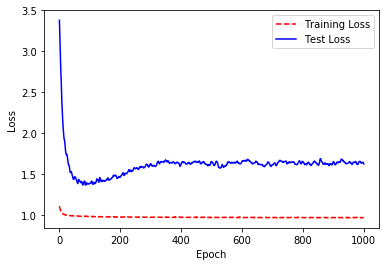

In [77]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [78]:
y_pred=model.predict(X_test)

In [79]:
#since it's the probability, need to change it to the index
y_pred = [ np.argmax(t) for t in y_pred ]

[[  0  21  83]
 [  0  12  52]
 [  0  17 104]]


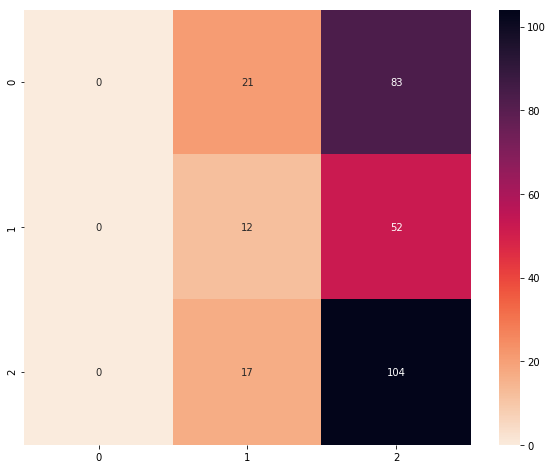

In [80]:
cm=metrics.confusion_matrix(y_test_class,y_pred)
print(cm)
import seaborn as sn
cmap = sn.cm.rocket_r
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True,cmap=cmap,fmt='g')
plt.show()

In [81]:
print(classification_report(y_test_class, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       104
          1       0.24      0.19      0.21        64
          2       0.44      0.86      0.58       121

avg / total       0.24      0.40      0.29       289



C:\Users\kyle1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [82]:
#if you want to keep training
# history=model.fit(X_train,y_train_class, batch_size=256, epochs=1000, verbose=1, validation_data=(X_val,y_val_class))

Regression CNN 1D

In [83]:
inputs=Input(X_train.shape[1:])
x=Dense(32)(inputs)
x=Conv1D(16,kernel_size=3,strides=1)(x)
x=BatchNormalization()(x)
# x=ReLU()(x)

# x1=Conv1D(16,4)(x)
# x=LeakyReLU(alpha=0.1)(x1)

# x2=MaxPooling1D(pool_size=1)(x)
# x=concatenate([x1,x2])
x=Flatten()(x)
# x=Dense(32,name='my16')(x)

predictions=Dense(1, activation='sigmoid')(x)
model=Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=Adam(lr=0.0001), loss='mean_squared_error', metrics=['mse'])
model.summary()
history=model.fit(X_train,y_train, batch_size=256, epochs=500, verbose=1,validation_data=(X_val,y_val))
#                  callbacks=[ReduceLROnPlateau(monitor='acc',factor=0.2, patience=5, min_lr= 0.00001),EarlyStopping(monitor='acc',patience=7)])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 5, 6)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5, 32)             224       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3, 16)             1552      
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 16)             64        
_________________________________________________________________
flatten_2 (Flatten)          (None, 48)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 49        
Total params: 1,889
Trainable params: 1,857
Non-trainable params: 32
_________________________________________________________________
Train o

866/866 [==============================] - 0s 16us/step - loss: 1.2079 - mean_squared_error: 1.2079 - val_loss: 1.0277 - val_mean_squared_error: 1.0277
Epoch 44/500
866/866 [==============================] - 0s 18us/step - loss: 1.2072 - mean_squared_error: 1.2072 - val_loss: 1.0279 - val_mean_squared_error: 1.0279
Epoch 45/500
866/866 [==============================] - 0s 15us/step - loss: 1.2075 - mean_squared_error: 1.2075 - val_loss: 1.0282 - val_mean_squared_error: 1.0282
Epoch 46/500
866/866 [==============================] - 0s 15us/step - loss: 1.2065 - mean_squared_error: 1.2065 - val_loss: 1.0284 - val_mean_squared_error: 1.0284
Epoch 47/500
866/866 [==============================] - 0s 14us/step - loss: 1.2066 - mean_squared_error: 1.2066 - val_loss: 1.0285 - val_mean_squared_error: 1.0285
Epoch 48/500
866/866 [==============================] - 0s 15us/step - loss: 1.2040 - mean_squared_error: 1.2040 - val_loss: 1.0288 - val_mean_squared_error: 1.0288
Epoch 49/500
866/866 [=

866/866 [==============================] - 0s 18us/step - loss: 1.1841 - mean_squared_error: 1.1841 - val_loss: 1.0306 - val_mean_squared_error: 1.0306
Epoch 93/500
866/866 [==============================] - 0s 17us/step - loss: 1.1805 - mean_squared_error: 1.1805 - val_loss: 1.0306 - val_mean_squared_error: 1.0306
Epoch 94/500
866/866 [==============================] - 0s 16us/step - loss: 1.1837 - mean_squared_error: 1.1837 - val_loss: 1.0306 - val_mean_squared_error: 1.0306
Epoch 95/500
866/866 [==============================] - 0s 15us/step - loss: 1.1824 - mean_squared_error: 1.1824 - val_loss: 1.0307 - val_mean_squared_error: 1.0307
Epoch 96/500
866/866 [==============================] - 0s 15us/step - loss: 1.1799 - mean_squared_error: 1.1799 - val_loss: 1.0306 - val_mean_squared_error: 1.0306
Epoch 97/500
866/866 [==============================] - 0s 15us/step - loss: 1.1801 - mean_squared_error: 1.1801 - val_loss: 1.0305 - val_mean_squared_error: 1.0305
Epoch 98/500
866/866 [=

866/866 [==============================] - 0s 18us/step - loss: 1.1647 - mean_squared_error: 1.1647 - val_loss: 1.0295 - val_mean_squared_error: 1.0295
Epoch 142/500
866/866 [==============================] - 0s 17us/step - loss: 1.1615 - mean_squared_error: 1.1615 - val_loss: 1.0295 - val_mean_squared_error: 1.0295
Epoch 143/500
866/866 [==============================] - 0s 23us/step - loss: 1.1657 - mean_squared_error: 1.1657 - val_loss: 1.0293 - val_mean_squared_error: 1.0293
Epoch 144/500
866/866 [==============================] - 0s 16us/step - loss: 1.1601 - mean_squared_error: 1.1601 - val_loss: 1.0293 - val_mean_squared_error: 1.0293
Epoch 145/500
866/866 [==============================] - 0s 16us/step - loss: 1.1613 - mean_squared_error: 1.1613 - val_loss: 1.0293 - val_mean_squared_error: 1.0293
Epoch 146/500
866/866 [==============================] - 0s 15us/step - loss: 1.1612 - mean_squared_error: 1.1612 - val_loss: 1.0294 - val_mean_squared_error: 1.0294
Epoch 147/500
866/

866/866 [==============================] - 0s 17us/step - loss: 1.1429 - mean_squared_error: 1.1429 - val_loss: 1.0262 - val_mean_squared_error: 1.0262
Epoch 191/500
866/866 [==============================] - 0s 18us/step - loss: 1.1416 - mean_squared_error: 1.1416 - val_loss: 1.0258 - val_mean_squared_error: 1.0258
Epoch 192/500
866/866 [==============================] - 0s 26us/step - loss: 1.1436 - mean_squared_error: 1.1436 - val_loss: 1.0255 - val_mean_squared_error: 1.0255
Epoch 193/500
866/866 [==============================] - 0s 16us/step - loss: 1.1428 - mean_squared_error: 1.1428 - val_loss: 1.0255 - val_mean_squared_error: 1.0255
Epoch 194/500
866/866 [==============================] - 0s 16us/step - loss: 1.1424 - mean_squared_error: 1.1424 - val_loss: 1.0254 - val_mean_squared_error: 1.0254
Epoch 195/500
866/866 [==============================] - 0s 17us/step - loss: 1.1448 - mean_squared_error: 1.1448 - val_loss: 1.0254 - val_mean_squared_error: 1.0254
Epoch 196/500
866/

866/866 [==============================] - 0s 16us/step - loss: 1.1179 - mean_squared_error: 1.1179 - val_loss: 1.0219 - val_mean_squared_error: 1.0219
Epoch 240/500
866/866 [==============================] - 0s 14us/step - loss: 1.1168 - mean_squared_error: 1.1168 - val_loss: 1.0219 - val_mean_squared_error: 1.0219
Epoch 241/500
866/866 [==============================] - 0s 21us/step - loss: 1.1220 - mean_squared_error: 1.1220 - val_loss: 1.0218 - val_mean_squared_error: 1.0218
Epoch 242/500
866/866 [==============================] - 0s 16us/step - loss: 1.1152 - mean_squared_error: 1.1152 - val_loss: 1.0216 - val_mean_squared_error: 1.0216
Epoch 243/500
866/866 [==============================] - 0s 15us/step - loss: 1.1144 - mean_squared_error: 1.1144 - val_loss: 1.0216 - val_mean_squared_error: 1.0216
Epoch 244/500
866/866 [==============================] - ETA: 0s - loss: 1.1606 - mean_squared_error: 1.16 - 0s 16us/step - loss: 1.1139 - mean_squared_error: 1.1139 - val_loss: 1.0214

866/866 [==============================] - 0s 22us/step - loss: 0.9585 - mean_squared_error: 0.9585 - val_loss: 0.9546 - val_mean_squared_error: 0.9546
Epoch 289/500
866/866 [==============================] - 0s 16us/step - loss: 0.9525 - mean_squared_error: 0.9525 - val_loss: 0.9476 - val_mean_squared_error: 0.9476
Epoch 290/500
866/866 [==============================] - 0s 15us/step - loss: 0.9484 - mean_squared_error: 0.9484 - val_loss: 0.9406 - val_mean_squared_error: 0.9406
Epoch 291/500
866/866 [==============================] - 0s 15us/step - loss: 0.9444 - mean_squared_error: 0.9444 - val_loss: 0.9368 - val_mean_squared_error: 0.9368
Epoch 292/500
866/866 [==============================] - 0s 14us/step - loss: 0.9417 - mean_squared_error: 0.9417 - val_loss: 0.9356 - val_mean_squared_error: 0.9356
Epoch 293/500
866/866 [==============================] - 0s 16us/step - loss: 0.9411 - mean_squared_error: 0.9411 - val_loss: 0.9352 - val_mean_squared_error: 0.9352
Epoch 294/500
866/

866/866 [==============================] - 0s 16us/step - loss: 0.8788 - mean_squared_error: 0.8788 - val_loss: 0.9683 - val_mean_squared_error: 0.9683
Epoch 338/500
866/866 [==============================] - 0s 16us/step - loss: 0.8794 - mean_squared_error: 0.8794 - val_loss: 0.9674 - val_mean_squared_error: 0.9674
Epoch 339/500
866/866 [==============================] - 0s 16us/step - loss: 0.8798 - mean_squared_error: 0.8798 - val_loss: 0.9682 - val_mean_squared_error: 0.9682
Epoch 340/500
866/866 [==============================] - 0s 15us/step - loss: 0.8792 - mean_squared_error: 0.8792 - val_loss: 0.9703 - val_mean_squared_error: 0.9703
Epoch 341/500
866/866 [==============================] - 0s 16us/step - loss: 0.8762 - mean_squared_error: 0.8762 - val_loss: 0.9704 - val_mean_squared_error: 0.9704
Epoch 342/500
866/866 [==============================] - 0s 23us/step - loss: 0.8810 - mean_squared_error: 0.8810 - val_loss: 0.9722 - val_mean_squared_error: 0.9722
Epoch 343/500
866/

866/866 [==============================] - 0s 21us/step - loss: 0.8610 - mean_squared_error: 0.8610 - val_loss: 1.0132 - val_mean_squared_error: 1.0132
Epoch 387/500
866/866 [==============================] - 0s 18us/step - loss: 0.8652 - mean_squared_error: 0.8652 - val_loss: 1.0145 - val_mean_squared_error: 1.0145
Epoch 388/500
866/866 [==============================] - 0s 15us/step - loss: 0.8603 - mean_squared_error: 0.8603 - val_loss: 1.0144 - val_mean_squared_error: 1.0144
Epoch 389/500
866/866 [==============================] - 0s 15us/step - loss: 0.8623 - mean_squared_error: 0.8623 - val_loss: 1.0134 - val_mean_squared_error: 1.0134
Epoch 390/500
866/866 [==============================] - 0s 20us/step - loss: 0.8605 - mean_squared_error: 0.8605 - val_loss: 1.0120 - val_mean_squared_error: 1.0120
Epoch 391/500
866/866 [==============================] - 0s 18us/step - loss: 0.8616 - mean_squared_error: 0.8616 - val_loss: 1.0111 - val_mean_squared_error: 1.0111
Epoch 392/500
866/

866/866 [==============================] - 0s 17us/step - loss: 0.8516 - mean_squared_error: 0.8516 - val_loss: 1.0361 - val_mean_squared_error: 1.0361
Epoch 436/500
866/866 [==============================] - 0s 17us/step - loss: 0.8519 - mean_squared_error: 0.8519 - val_loss: 1.0361 - val_mean_squared_error: 1.0361
Epoch 437/500
866/866 [==============================] - 0s 16us/step - loss: 0.8523 - mean_squared_error: 0.8523 - val_loss: 1.0368 - val_mean_squared_error: 1.0368
Epoch 438/500
866/866 [==============================] - 0s 15us/step - loss: 0.8507 - mean_squared_error: 0.8507 - val_loss: 1.0377 - val_mean_squared_error: 1.0377
Epoch 439/500
866/866 [==============================] - 0s 16us/step - loss: 0.8523 - mean_squared_error: 0.8523 - val_loss: 1.0376 - val_mean_squared_error: 1.0376
Epoch 440/500
866/866 [==============================] - 0s 15us/step - loss: 0.8528 - mean_squared_error: 0.8528 - val_loss: 1.0379 - val_mean_squared_error: 1.0379
Epoch 441/500
866/

866/866 [==============================] - 0s 16us/step - loss: 0.8456 - mean_squared_error: 0.8456 - val_loss: 1.0419 - val_mean_squared_error: 1.0419
Epoch 485/500
866/866 [==============================] - 0s 15us/step - loss: 0.8447 - mean_squared_error: 0.8447 - val_loss: 1.0420 - val_mean_squared_error: 1.0420
Epoch 486/500
866/866 [==============================] - 0s 15us/step - loss: 0.8465 - mean_squared_error: 0.8465 - val_loss: 1.0422 - val_mean_squared_error: 1.0422
Epoch 487/500
866/866 [==============================] - 0s 18us/step - loss: 0.8442 - mean_squared_error: 0.8442 - val_loss: 1.0423 - val_mean_squared_error: 1.0423
Epoch 488/500
866/866 [==============================] - 0s 18us/step - loss: 0.8440 - mean_squared_error: 0.8440 - val_loss: 1.0425 - val_mean_squared_error: 1.0425
Epoch 489/500
866/866 [==============================] - 0s 16us/step - loss: 0.8453 - mean_squared_error: 0.8453 - val_loss: 1.0425 - val_mean_squared_error: 1.0425
Epoch 490/500
866/

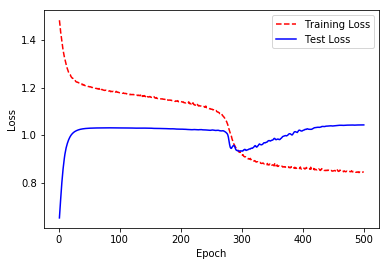

In [84]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [85]:
y_pred=model.predict(X_test)

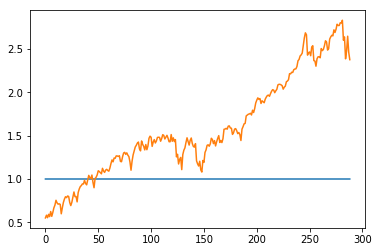

In [86]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()

In [87]:
print("RMSE of CNN on test set: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE of CNN on test set:  0.8224649537465623


LSTM

In [88]:
inputs=Input(X_train.shape[1:])

x=LSTM(64,dropout=0.5,recurrent_dropout=0.5)(inputs)
x=BatchNormalization()(x)
# x=LSTM(64)(x)
x=Dense(128,activation='relu')(x)
# x=Dense(32)(x)
x=LeakyReLU()(x)
predictions=Dense(1,activation='sigmoid')(x)

model= Model(inputs=inputs,outputs=predictions)
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.summary()
history=model.fit(X_train, y_train, validation_data=(X_val,y_val),
          batch_size=256,
          epochs=100,
          verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 5, 6)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                18176     
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 26,881
Trainable params: 26,753
Non-trainable params: 128
_________________________________________________________________
Trai

866/866 [==============================] - 0s 82us/step - loss: 0.6803 - val_loss: 0.1055
Epoch 70/100
866/866 [==============================] - 0s 92us/step - loss: 0.6804 - val_loss: 0.1055
Epoch 71/100
866/866 [==============================] - 0s 91us/step - loss: 0.6802 - val_loss: 0.1055
Epoch 72/100
866/866 [==============================] - 0s 90us/step - loss: 0.6803 - val_loss: 0.1055
Epoch 73/100
866/866 [==============================] - 0s 90us/step - loss: 0.6802 - val_loss: 0.1055
Epoch 74/100
866/866 [==============================] - 0s 83us/step - loss: 0.6803 - val_loss: 0.1055
Epoch 75/100
866/866 [==============================] - 0s 90us/step - loss: 0.6801 - val_loss: 0.1055
Epoch 76/100
866/866 [==============================] - 0s 84us/step - loss: 0.6803 - val_loss: 0.1055
Epoch 77/100
866/866 [==============================] - 0s 90us/step - loss: 0.6801 - val_loss: 0.1055
Epoch 78/100
866/866 [==============================] - 0s 91us/step - loss: 0.6801 - 

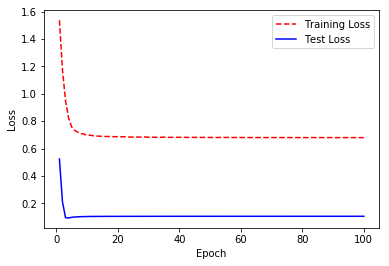

In [89]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [90]:
y_pred=model.predict(X_test)

In [91]:
y_pred

array([[3.55256111e-06],
       [4.41522161e-06],
       [4.24551081e-06],
       [3.97868189e-06],
       [3.78607592e-06],
       [3.58025022e-06],
       [2.70413830e-06],
       [2.86214322e-06],
       [3.01445198e-06],
       [3.44915338e-06],
       [3.67135203e-06],
       [3.56849341e-06],
       [3.78663935e-06],
       [3.52161533e-06],
       [3.68021711e-06],
       [3.54925237e-06],
       [3.99064083e-06],
       [4.58339036e-06],
       [5.51350286e-06],
       [5.39124085e-06],
       [5.93186587e-06],
       [6.07774973e-06],
       [5.82659504e-06],
       [6.57988903e-06],
       [6.91616424e-06],
       [6.12757367e-06],
       [7.50509435e-06],
       [7.36289576e-06],
       [6.26344490e-06],
       [5.11923281e-06],
       [4.42911323e-06],
       [4.64605864e-06],
       [5.30981924e-06],
       [5.16663113e-06],
       [5.23089466e-06],
       [5.47293439e-06],
       [5.44486329e-06],
       [5.34762785e-06],
       [4.94158667e-06],
       [5.50895629e-06],


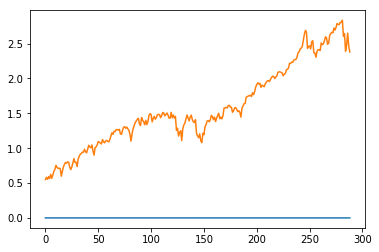

In [92]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()

## Final thoughts

I figured all the models weren't performing that well, which might mean my feature selection wasn't that good.
So I thought of just using today's price to use as a feature to predict tomorrow's price, and it turned out pretty well with just linear regression.

In [93]:
X_data=np.array(data2.drop(['target'],axis=1))
# X_data=[float(i) for i in X_data]
X_data=X_data.astype(float)
print("Shape of X_data is: ", X_data.shape,'\nSneak peek on first five elements: \n', X_data[0:5])

Shape of X_data is:  (7228, 7) 
Sneak peek on first five elements: 
 [[359.69   17.24    7.93    7.875   7.847 399.     22.89 ]
 [358.76   18.19    7.974   7.927   7.911 395.     23.68 ]
 [355.67   19.22    7.972   7.91    7.9   396.5    23.41 ]
 [352.2    20.11    7.984   7.885   7.896 405.     23.08 ]
 [353.79   20.26    8.012   7.893   7.907 404.6    21.62 ]]


In [94]:
y_data=np.array(data2.target)
y_data=[float(i) for i in y_data]
print("Length of y_data is :", len(y_data),'\nSneak peek on first five elements: \n', y_data[0:5])

Length of y_data is : 7228 
Sneak peek on first five elements: 
 [358.76, 355.67, 352.2, 353.79, 349.62]


In [95]:
X_train=np.array(X_data[0:int(0.8*len(X_data))])
y_train=np.array(y_data[0:int(0.8*len(y_data))])
y_train_class=np.array(y_data_class[0:int(0.8*len(y_data_class))])
X_test=np.array(X_data[int(0.8*len(X_data)):])
y_test=np.array(y_data[int(0.8*len(y_data)):])
y_test_class=np.array(y_data_class[int(0.8*len(y_data_class)):])

In [96]:
#Data Scaling
sc=StandardScaler()
sc2=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
y_train=sc2.fit_transform(y_train.reshape(-1,1))
y_test=sc2.transform(y_test.reshape(-1,1))
X_data_sc=sc.fit_transform(X_data)
y_data_sc=sc.fit_transform(np.array(y_data).reshape(-1,1))

In [97]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

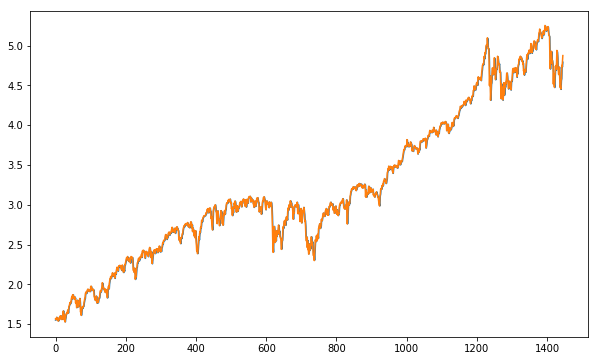

RMSE of test set:  0.046653871173250726


In [98]:

#fit data to model and graph results
y_pred=model.predict(X_test)
figure(figsize=(10,6))
plt.plot(y_pred)
plt.plot(y_test)
plt.show()
print("RMSE of test set: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


## 4. Conclusion

In conclusion, even though many models seems to be complicated, they have their pros and cons.   
Complicated models doesn't directly imply that the results will be better.  
More importantly is the feature selection and hyperparameter tunings for me, since in this ipynb we can see that just by adding 1 feature drastically improved the predictions and reduced the RMSE by a lot.


References:
Codes in course by professor Purewal
Cardiologist-Level Arrhythmia Detection with Convolutional Neural Networks, Andrew Ng.(https://arxiv.org/pdf/1707.01836.pdf)
Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras, Jason Brownlee
(https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)
What is LightGBM, How to implement it? How to fine tune the parameters?, Pushkar Mandot
(https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc)
